##  Load our Dataset

In [1]:
from keras.datasets import mnist
(x_train,y_train),(x_test,y_test) = mnist.load_data()
print(x_train.shape , y_train.shape, x_test.shape,y_test.shape)

Using TensorFlow backend.


(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Lets see some images

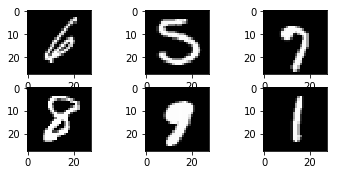

In [2]:
import matplotlib.pyplot as plt
import numpy as np
plt.subplot(331)
num = np.random.randint(0,len(x_train))
plt.imshow(x_train[num],cmap = plt.get_cmap('gray'))

plt.subplot(332)
num = np.random.randint(0,len(x_train))
plt.imshow(x_train[num],cmap = plt.get_cmap('gray'))

plt.subplot(333)
num = np.random.randint(0,len(x_train))
plt.imshow(x_train[num],cmap = plt.get_cmap('gray'))

plt.subplot(334)
num = np.random.randint(0,len(x_train))
plt.imshow(x_train[num],cmap = plt.get_cmap('gray'))

plt.subplot(335)
num = np.random.randint(0,len(x_train))
plt.imshow(x_train[num],cmap = plt.get_cmap('gray'))

plt.subplot(336)
num = np.random.randint(0,len(x_train))
plt.imshow(x_train[num],cmap = plt.get_cmap('gray'))

## Reshape and normalizing the data

In [3]:
# Reshape the data
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], x_train.shape[2], 1)
# Normalise the data
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train/255.0
x_test/255.0
print(x_train.shape)

(60000, 28, 28, 1)


## One Hot Encoding labels

In [0]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test[0].shape[0]

## Prepare the Model

In [7]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense
from keras import backend as K
model = Sequential()
model.add(Conv2D(32,kernel_size=(5,5),
                 activation = 'relu',
                 input_shape = (x_train[0].shape)))
model.add(Conv2D(64,kernel_size=(4,4),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes,activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 21, 21, 64)        32832     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 10, 64)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 6400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               819328    
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
__________

In [8]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])
history = model.fit(x_train,
                    y_train,
                    batch_size = 256,
                    epochs = 20,
                    verbose = 1,
                    validation_data = (x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 6s 103us/step - loss: 3.1508 - acc: 0.7520 - val_loss: 0.0671 - val_acc: 0.9793
Epoch 2/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.1242 - acc: 0.9639 - val_loss: 0.0450 - val_acc: 0.9844
Epoch 3/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0858 - acc: 0.9756 - val_loss: 0.0364 - val_acc: 0.9873
Epoch 4/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0694 - acc: 0.9789 - val_loss: 0.0350 - val_acc: 0.9871
Epoch 5/20
60000/60000 [==============================] - 6s 95us/step - loss: 0.0618 - acc: 0.9814 - val_loss: 0.0309 - val_acc: 0.9899
Epoch 6/20
60000/60000 [==============================] - 6s 96us/step - loss: 0.0560 - acc: 0.9834 - val_loss: 0.0330 - val_acc: 0.9889
Epoch 7/20
60000/60000 [==============================] - 6s 97us/step - loss: 0.0481 - acc: 0.9860 - val_loss: 0.0301 - val_ac

In [9]:
score = model.evaluate(x_test,y_test,verbose=0)
print(score)

[0.03521678062466626, 0.9909]


## Loss Plot

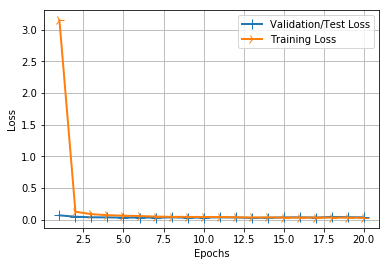

In [10]:
history_dict = history.history

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_loss_values, label='Validation/Test Loss')
line2 = plt.plot(epochs, loss_values, label='Training Loss')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Loss')
plt.grid(True)
plt.legend()
plt.show()

## Accuracy Plot

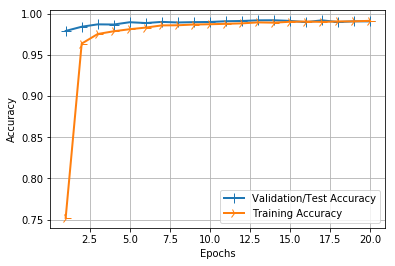

In [11]:
history_dict = history.history

acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
epochs = range(1, len(loss_values) + 1)

line1 = plt.plot(epochs, val_acc_values, label='Validation/Test Accuracy')
line2 = plt.plot(epochs, acc_values, label='Training Accuracy')
plt.setp(line1, linewidth=2.0, marker = '+', markersize=10.0)
plt.setp(line2, linewidth=2.0, marker = '4', markersize=10.0)
plt.xlabel('Epochs') 
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()

## Saving the model

In [12]:
model.save("mnist.h5")
print("Model Saved")

Model Saved


## Load the model

In [0]:
from keras.models import load_model
classifier = load_model('mnist.h5')

## Predicting from model

W0621 11:34:35.124484 139805072041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0621 11:34:35.150349 139805072041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0621 11:34:35.181552 139805072041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0621 11:34:35.213302 139805072041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0621 11:34:35.238146 139805072041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0621 11:34:35.262728 139805072041856 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0621 11:34:35.287921 139805

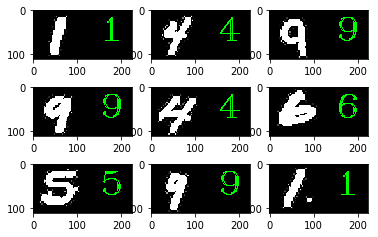

In [15]:
import cv2

def draw_test(name, pred, input_im,i):
    BLACK = [0,0,0]
    expanded_image = cv2.copyMakeBorder(input_im, 0, 0, 0, imageL.shape[0] ,cv2.BORDER_CONSTANT,value=BLACK)
    expanded_image = cv2.cvtColor(expanded_image, cv2.COLOR_GRAY2BGR)
    cv2.putText(expanded_image, str(pred), (152, 70) , cv2.FONT_HERSHEY_COMPLEX_SMALL,4, (0,255,0), 2)
    plt.subplot(331+i)
    plt.imshow(expanded_image)
    plt.imsave(str(i)+".jpg",expanded_image)
   

for i in range(0,9):
    rand = np.random.randint(0,len(x_test))
    input_im = x_test[rand]

    imageL = cv2.resize(input_im, None, fx=4, fy=4, interpolation = cv2.INTER_CUBIC)
    input_im = input_im.reshape(1,28,28,1) 
    
    ## Get Prediction
    res = str(classifier.predict_classes(input_im, 1, verbose = 0)[0])

    draw_test("Prediction", res, imageL,i) 
    